<h1>🚢 Titanic Dataset Exploratory Data Analysis (EDA)</h1>
<p>Uncovering patterns and insights from one of history's most famous maritime disasters</p>


<h2>1. Import the necessary libraries</h2>


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>2. Load the dataset and check it's metadata</h2>


In [2]:
titanic = sns.load_dataset("titanic")

# print first 5 rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# shape of the dataset

print(f"Shape: {titanic.shape}")

Shape: (891, 15)


In [4]:
# data type of the dataset

print(f"Data type: {type(titanic)}")

Data type: <class 'pandas.core.frame.DataFrame'>


In [5]:
# columns in the dataset

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
# data types of each column

titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
# quick summary of the entire dataset with values like min, max, count, freq, etc

titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>3. Check for missing values</h2>


In [8]:
# number of missing values in each column

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# percentage of missing values in each column

(titanic.isnull().sum() / len(titanic)) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<h2>4. Missing values Heatmap</h2>


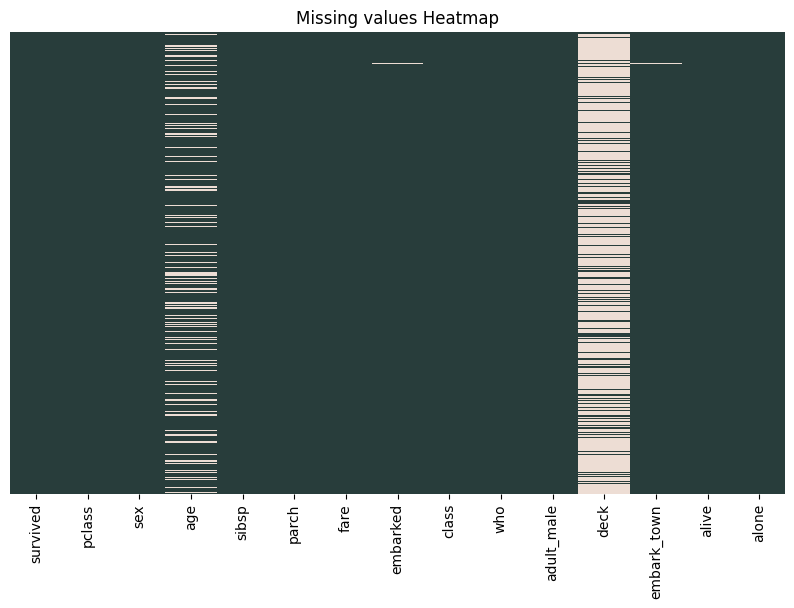

In [10]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    titanic.isnull(),
    cmap=sns.color_palette(["#283d3b", "#edddd4"]),
    cbar=False,
    yticklabels=False,
)

plt.title("Missing values Heatmap")

plt.show()

<h2>5. Impute missing values using Random Forest Regression</h2>


In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# make a copy
titanic_filled = titanic.copy()

# seperate numerical and categorical data
numerical_columns = titanic_filled.select_dtypes(include=["number"]).columns
categorical_columns = titanic_filled.select_dtypes(exclude=["number"]).columns

# for numerical features
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_filled[numerical_columns] = imputer.fit_transform(
    titanic_filled[numerical_columns]
)

# for categorical features
for col in categorical_columns:
    titanic_filled[col] = titanic_filled[col].fillna(titanic_filled[col].mode()[0])

c:\Users\Koustav Chatterjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [12]:
# verify if all missing values got filled

titanic_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<h2>6. Univariate analysis</h2>


> <h3>i. Analyze "survived" column</h3>


In [13]:
# survival count
# 0.0 = No, 1.0 = Yes

titanic_filled["survived"].value_counts()

survived
0.0    549
1.0    342
Name: count, dtype: int64

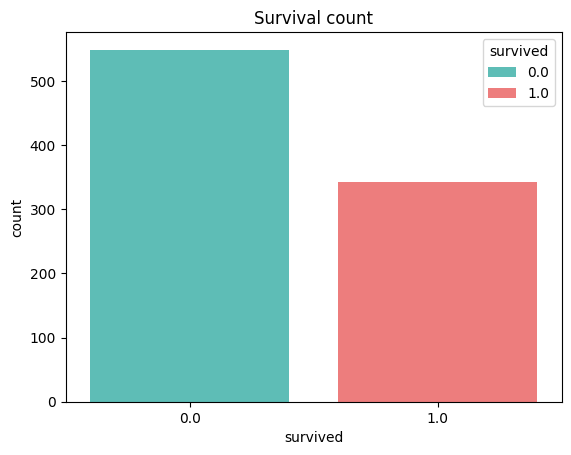

In [14]:
# bar chart of "survived" column

sns.countplot(
    x="survived", data=titanic_filled, palette=["#4ECDC4", "#FF6B6B"], hue="survived"
)
plt.title("Survival count")
plt.show()

> <h3>ii. Analyse "pclass" column</h3>


In [15]:
# passenger class distribution

titanic_filled["pclass"].value_counts()

pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64

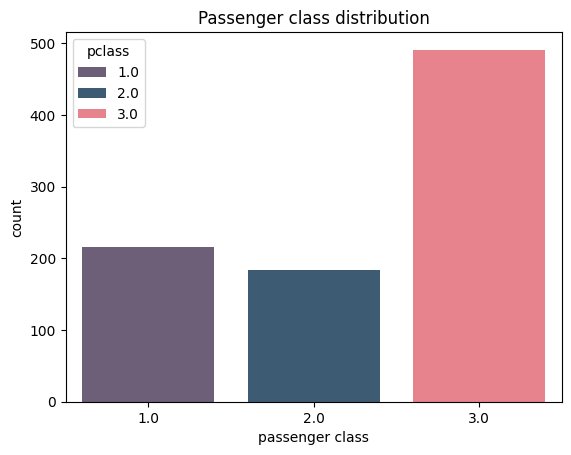

In [16]:
# bar chart of "pclass" column

sns.countplot(
    x="pclass",
    data=titanic_filled,
    palette=["#6c5b7b", "#355c7d", "#f67280"],
    hue="pclass",
)
plt.title("Passenger class distribution")
plt.xlabel("passenger class")
plt.show()

> <h3>iii. Analyse "age" column</h3>


In [17]:
# age distribution

titanic_filled["age"].describe()

count    891.000000
mean      29.614669
std       13.738976
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

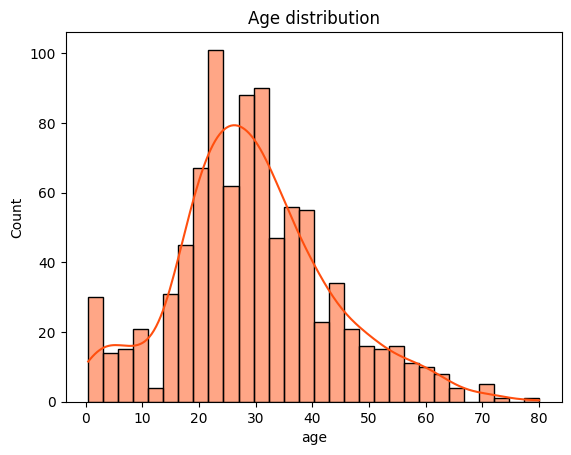

In [18]:
# histogram of "age" column

sns.histplot(x="age", data=titanic_filled, color="#ff4f0f", bins=30, kde=True)
plt.title("Age distribution")
plt.show()

> <h3>iv. Analyse "sex" column</h3>


In [19]:
# sex distribution

titanic_filled["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

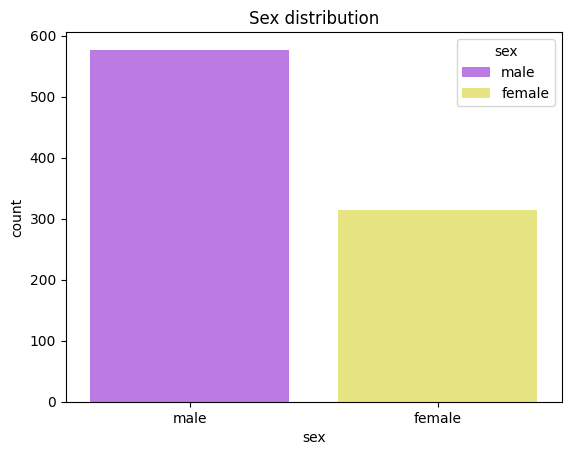

In [20]:
# bar chart of "sex" column

sns.countplot(x="sex", data=titanic_filled, palette=["#bf68f6", "#f7f373"], hue="sex")
plt.legend(title="sex", labels=["male", "female"])
plt.title("Sex distribution")
plt.show()

<h2>7. Bivariate analysis</h2>
<p>Anazlyse survaival rate based on sex, passenger class, and, age</p>


> <h3>i. Analyse survival rate with sex</h3>


In [21]:
# survival by sex

titanic_filled.groupby("sex")["survived"].value_counts()

sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

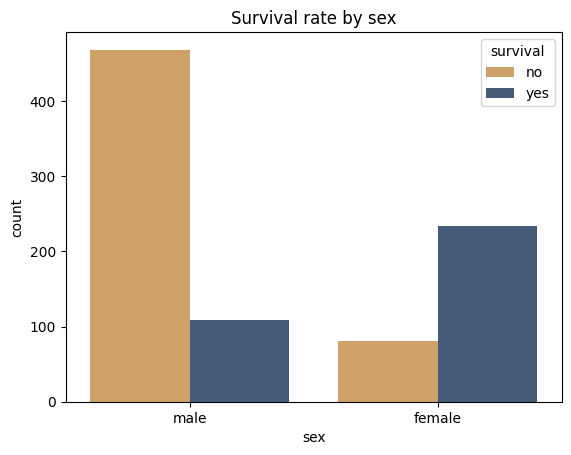

In [22]:
sns.countplot(
    x="sex", hue="survived", data=titanic_filled, palette=["#e0a458", "#3d5a80"]
)
plt.legend(title="survival", labels=["no", "yes"])
plt.title("Survival rate by sex")
plt.show()

> <h3>ii. Analyse survival rate with passenger class</h3>


In [23]:
# survival by passenger class

titanic_filled.groupby("pclass")["survived"].value_counts()

pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64

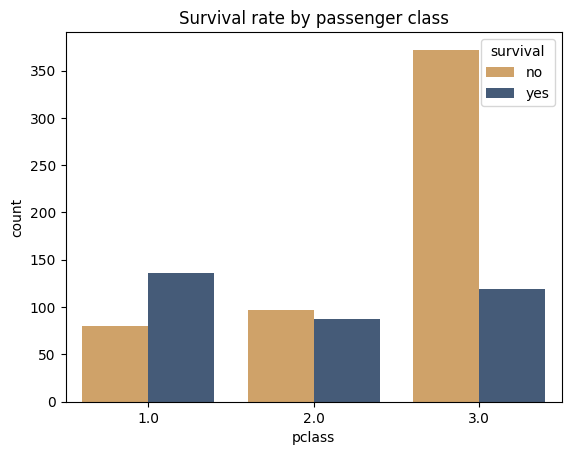

In [24]:
sns.countplot(
    x="pclass", hue="survived", data=titanic_filled, palette=["#e0a458", "#3d5a80"]
)
plt.legend(title="survival", labels=["no", "yes"])
plt.title("Survival rate by passenger class")
plt.show()

> <h3>iii. Analyse survival rate with age</h3>


In [25]:
titanic_filled["age_group"] = pd.cut(
    titanic_filled["age"], bins=[0, 18, 65, 100], labels=["child", "adult", "senior"]
)

In [26]:
# survival by age

titanic_filled.groupby("age_group")["survived"].value_counts()

C:\Users\Koustav Chatterjee\AppData\Local\Temp\ipykernel_14488\1888375234.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_filled.groupby("age_group")["survived"].value_counts()


age_group  survived
child      0.0          80
           1.0          76
adult      0.0         462
           1.0         265
senior     0.0           7
           1.0           1
Name: count, dtype: int64

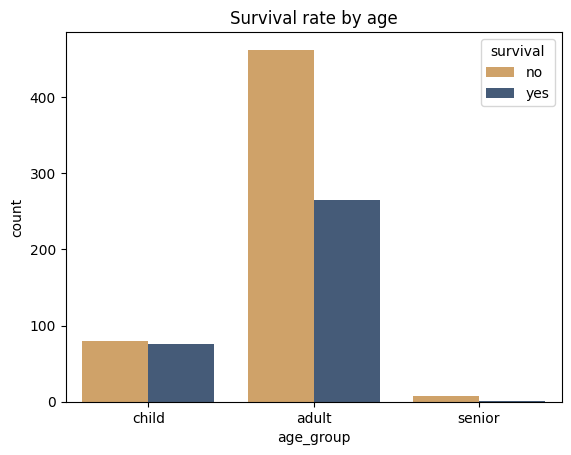

In [27]:
sns.countplot(
    x="age_group", hue="survived", data=titanic_filled, palette=["#e0a458", "#3d5a80"]
)
plt.legend(title="survival", labels=["no", "yes"])
plt.title("Survival rate by age")
plt.show()

<h2>8. Analysis of survival rate with more than 2 columns</h2>


In [28]:
# survival by sex and passenger class

titanic_filled.groupby(["sex", "pclass"])["survived"].value_counts()

sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64

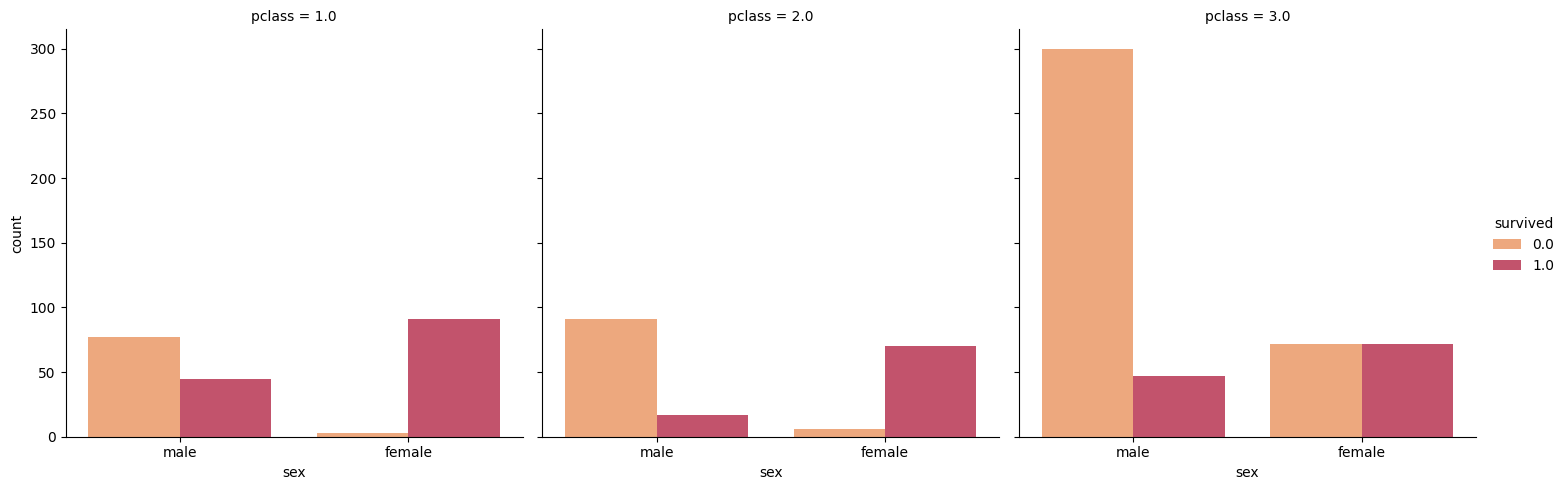

In [29]:
sns.catplot(
    x="sex",
    hue="survived",
    col="pclass",
    kind="count",
    data=titanic_filled,
    palette=["#ffa36c", "#d54062"],
)
plt.show()

<h2>9. Key observations from the visualization</h2>


<p>We found the following insigts: </p>
<ul>
  <li><b>Sex:</b> Female passengers had a higher survival rate than male massengers.</li>
  <li><b>Passenger class:</b> 1<sup>st</sup> class passengers had a better chance of survival.</li>
  <li><b>Age:</b> Children were more likely to survive.</li>
</ul>


<h2>10. Survival Analysis</h2>


<p>We'll anayze how survival rate is dependent on the following: </p>
<ul>
  <li>Embarkation point</li>
  <li>Fare ranges</li>
  <li>Family size (sibsp + parch)</li>
</ul>


> <h3>i. Survival based on Embarkation point</h3>


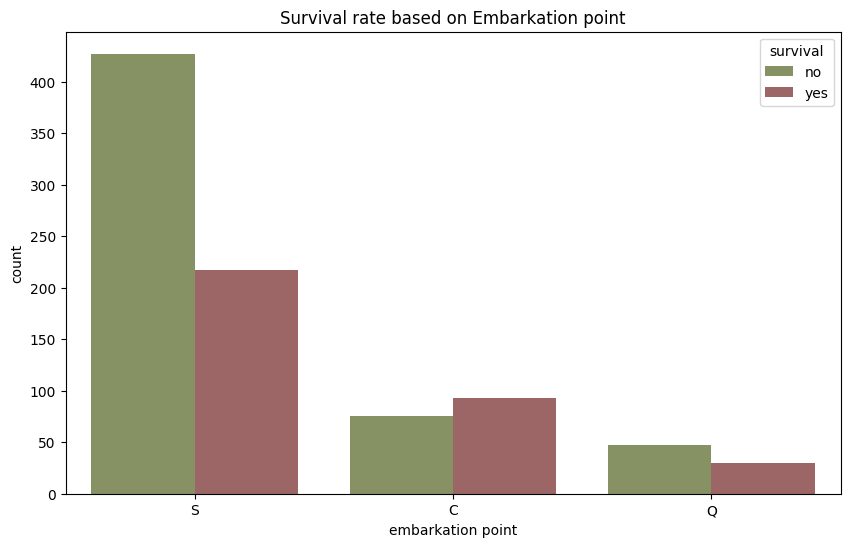

In [30]:
# embarkation point: the port where passengers boarded the Titanic
## C = Cherbourg, France
## Q = Queenstown, Ireland
## S = Southampton, England

plt.figure(figsize=(10, 6))
sns.countplot(
    x="embarked", hue="survived", data=titanic, palette=["#8a9a5b", "#a55d5d"]
)

plt.title("Survival rate based on Embarkation point")

plt.xlabel("embarkation point")
plt.ylabel("count")

plt.legend(title="survival", labels=["no", "yes"])

plt.show()

> <h3>ii. Survival based on Fare</h3>


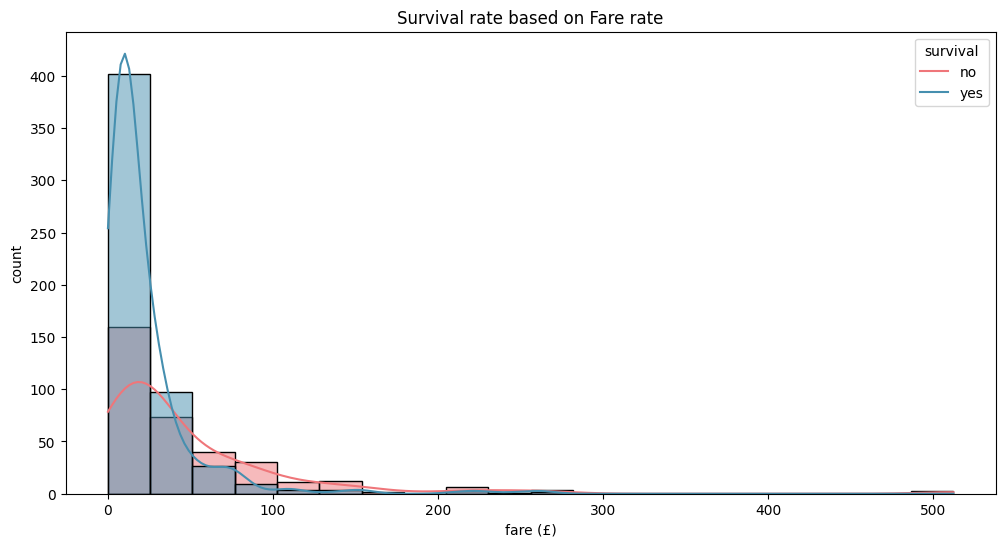

In [31]:
# fare = ticket price (in British pounds)

plt.figure(figsize=(12, 6))
sns.histplot(
    titanic, x="fare", hue="survived", bins=20, kde=True, palette=["#468faf", "#ef767a"]
)

plt.title("Survival rate based on Fare rate")

plt.xlabel("fare (£)")
plt.ylabel("count")

plt.legend(title="survival", labels=["no", "yes"])

plt.show()

> <h3>iii. Survival based on Family size</h3>


In [32]:
titanic["family_size"] = titanic["sibsp"] + titanic["parch"]

In [33]:
titanic["family_size"].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family_size, dtype: float64

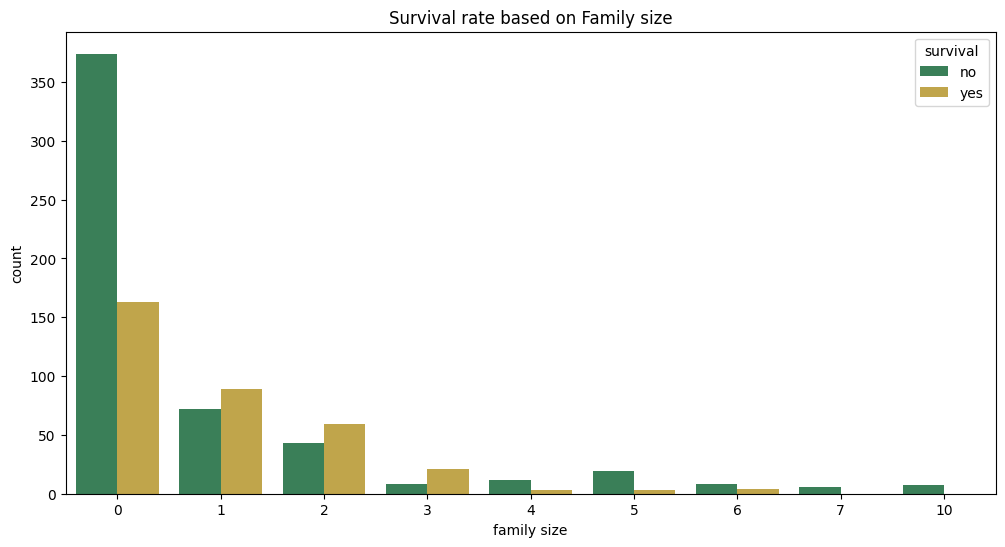

In [34]:
# fare = ticket price (in British pounds)

plt.figure(figsize=(12, 6))
sns.countplot(
    x="family_size", hue="survived", data=titanic, palette=["#2e8b57", "#d4af37"]
)

plt.title("Survival rate based on Family size")

plt.xlabel("family size")
plt.ylabel("count")

plt.legend(title="survival", labels=["no", "yes"])

plt.show()

<h2>11. Feature engineering</h2>
<p>Categorize passenger ages into buckets</p>


In [35]:
bins = [0, 12, 18, 40, 60, 80]
labels = ["child", "teen", "adult", "middle-aged", "senior"]

titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)

In [36]:
titanic["age_group"].describe()

count       714
unique        5
top       adult
freq        425
Name: age_group, dtype: object

<h2>12. Visualize survival rate based on age group</h2>


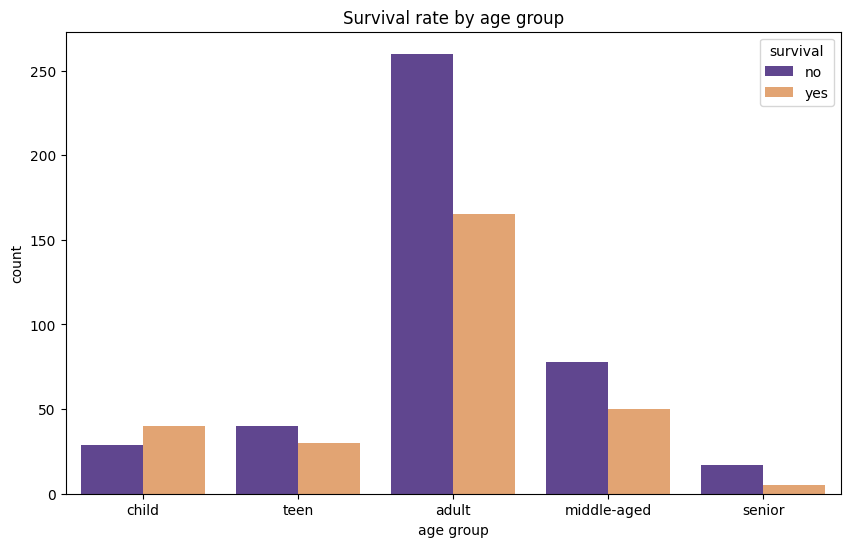

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="age_group", hue="survived", data=titanic, palette=["#5d3a9b", "#F4a261"]
)

plt.title("Survival rate by age group")

plt.xlabel("age group")
plt.ylabel("count")

plt.legend(title="survival", labels=["no", "yes"])

plt.show()

<h2>Advanced visualization</h2>
<p>Correlation Heartmap using Pearson correlation</p>


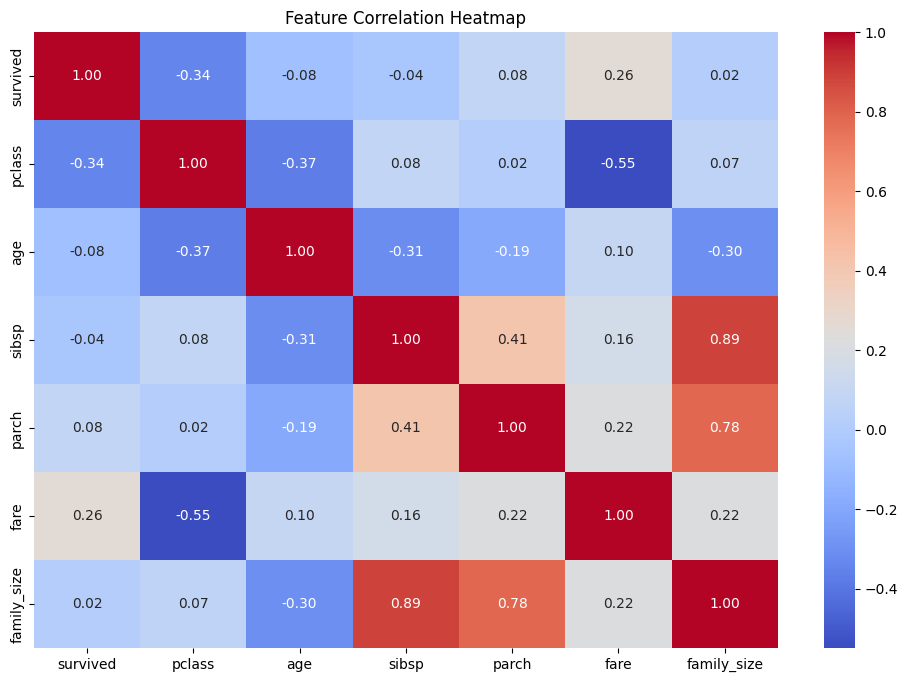

In [38]:
plt.figure(figsize=(12, 8))

numeric_features = titanic.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")

plt.show()

<h2>Conclusion of the Titanic EDA</h2>


<p>In this exploratory data analysis of the Titanic dataset, we uncovered several meaningful insights:</p>

<ul>
  <li><b>Survival Distribution:</b></li>
  <ul>
    <li>Overall, a majority of passengers did not survive.</li>
    <li>Women and children had higher survival rates compared to men.</li>
  </ul>

  <li><b>Passenger Class:</b></li>
  <ul>
    <li>Passengers in 1st class were significantly more likely to survive.</li>
    <li>Fare was positively correlated with survival — indicating wealth played a role in access to lifeboats.</li>
  </ul>

  <li><b>Age Patterns:</b></li>
  <ul>
    <li>Most passengers were between 20–40 years old.</li>
    <li>Children had a better chance of survival, especially if they were in higher classes.</li>
  </ul>

  <li><b>Embarkation Point:</b></li>
  <ul>
    <li>Most passengers boarded at Southampton (S).</li>
    <li>Survival rates varied slightly by embarkation port.</li>
  </ul>

  <li><b>Feature Correlations:</b></li>
  <ul>
    <li>Fare and Pclass showed a moderate negative correlation.</li>
    <liSibSp and Parch (family aboard) were positively correlated, which may impact survival in groups.

</li>
  </ul>
</ul>
